In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
total_analysts = 14
analyst_chance = 0.156
min_job_time = 15.7
max_job_time = 33.1
node_capacity = 72
node_cost = 130
third_node_cost = 110

def get_maximum_cost():
    maximum_use = total_analysts * max_job_time; 
    maximum_nodes = maximum_use / node_capacity
    maximum_cost = 0
    
    for i in range(math.ceil(maximum_nodes)):
        if i < 2:
            maximum_cost += node_cost
        else:
            maximum_cost += third_node_cost

    print("Maximum cost for 1 day",maximum_cost)
    
get_maximum_cost()

In [173]:
def get_cost_by_chance():
    
    nodes_in_use = 0
    day_cost = 0

    for j in range(total_analysts):
        analyst_has_to_work = np.random.random()
        
        if analyst_has_to_work <= analyst_chance:
            job_time = np.random.uniform(min_job_time, max_job_time)
            nodes_in_use = nodes_in_use + (job_time/node_capacity)
            
    for i in range(math.ceil(nodes_in_use)):
        if i < 2:
            day_cost += node_cost
        else:
            day_cost += third_node_cost

    return day_cost
        

def get_montecarlo_costs(num_trials: int):
    costs = []
    for i in range(num_trials):
        costs.append(get_cost_by_chance())

    return costs

week_cost = 0
for h in range(5):
    day_cost = get_cost_by_chance()
    week_cost = week_cost + day_cost

    
print("week cost", week_cost)
    

week cost 910


COSTES DIARIOS SOBRE 10000
coste medio 157.257
coste máximo 480


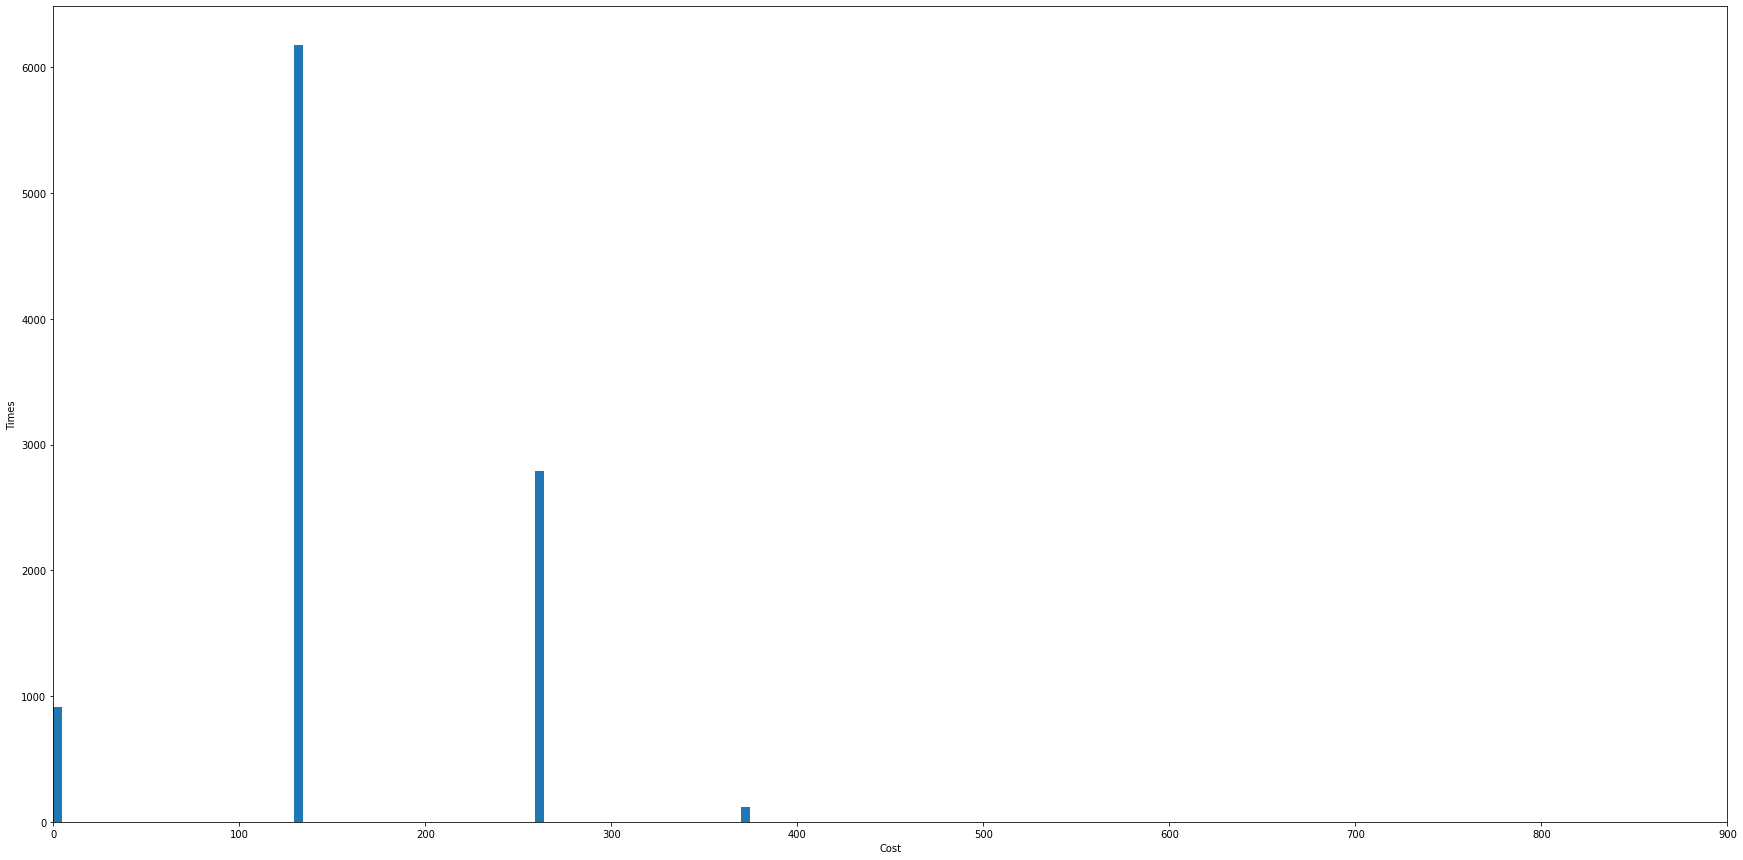

In [175]:
result = get_montecarlo_costs(10000)

plt.figure(figsize=(30, 15))
plt.xlabel('Cost')
plt.ylabel('Times')
plt.xlim(0,900)
_ = plt.hist(result, bins=100)

print("COSTES DIARIOS SOBRE 10000")
print("coste medio", sum(result) / len(result))
print("coste máximo", max(result))

COSTES SEMANALES (100 x 10)
coste mínimo 611.0
coste máximo 936.0
coste medio 785.82


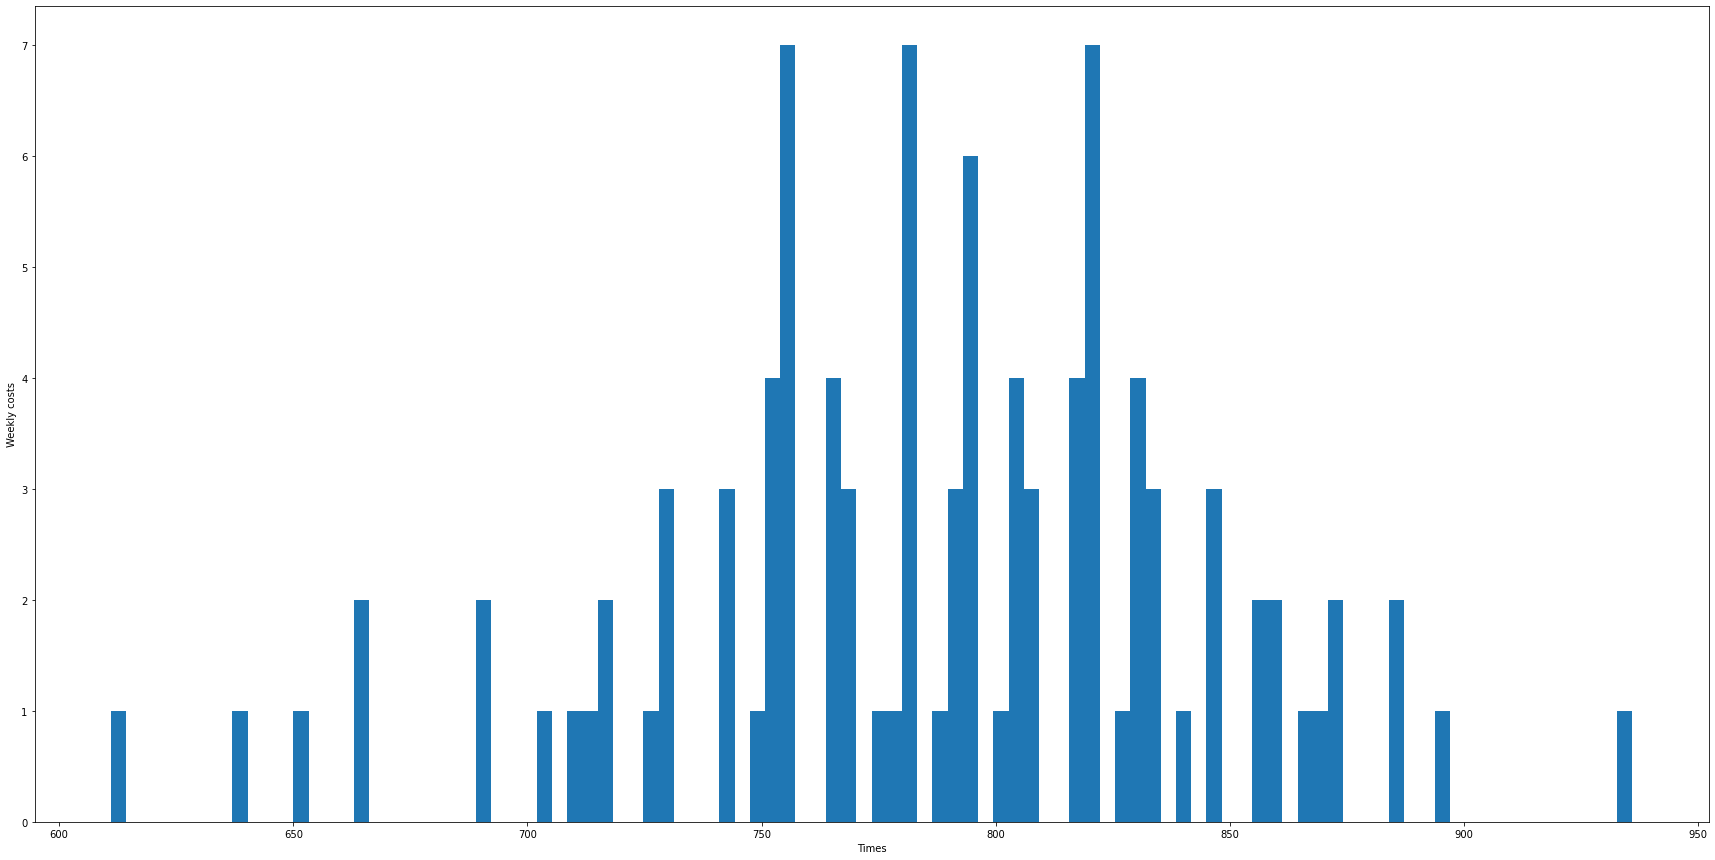

In [184]:
weeks = []

for j in range(100):
    weekcost = 0
    for i in range(5):
        result = get_montecarlo_costs(10)
        weekcost = weekcost + (sum(result) / len(result))

    weeks.append(weekcost)

print("COSTES SEMANALES (100 x 10)")
print("coste mínimo", round(min(weeks), 2))
print("coste máximo", round(max(weeks), 2))
print("coste medio", round(sum(weeks) / len(weeks), 2))
    
plt.figure(figsize=(30, 15))
plt.xlabel('Times')
plt.ylabel('Weekly costs')
_ = plt.hist(weeks, bins=100)


COSTES SEMANALES (100 x 1000)
coste mínimo 762.27
coste máximo 791.56
coste medio 777.73


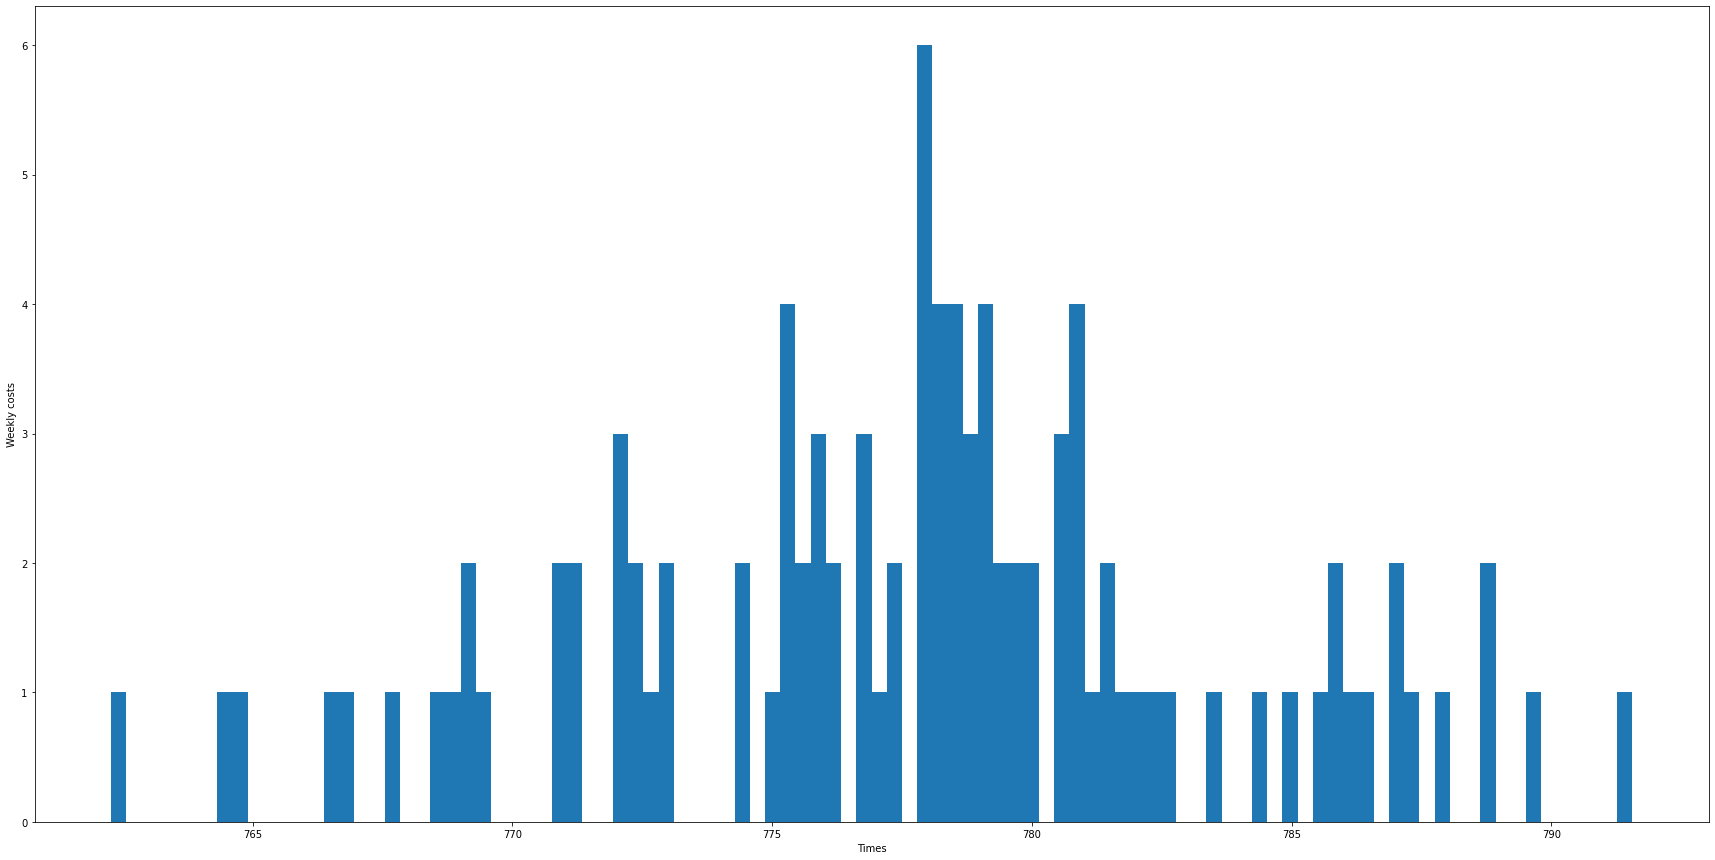

In [192]:
weeks = []

for j in range(100):
    weekcost = 0
    for i in range(5):
        result = get_montecarlo_costs(1000)
        weekcost = weekcost + (sum(result) / len(result))

    weeks.append(weekcost)

print("COSTES SEMANALES (100 x 1000)")
print("coste mínimo", round(min(weeks), 2))
print("coste máximo", round(max(weeks), 2))
print("coste medio", round(sum(weeks) / len(weeks), 2))
    
plt.figure(figsize=(30, 15))
plt.xlabel('Times')
plt.ylabel('Weekly costs')
_ = plt.hist(weeks, bins=100)